In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [107]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')

In [108]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


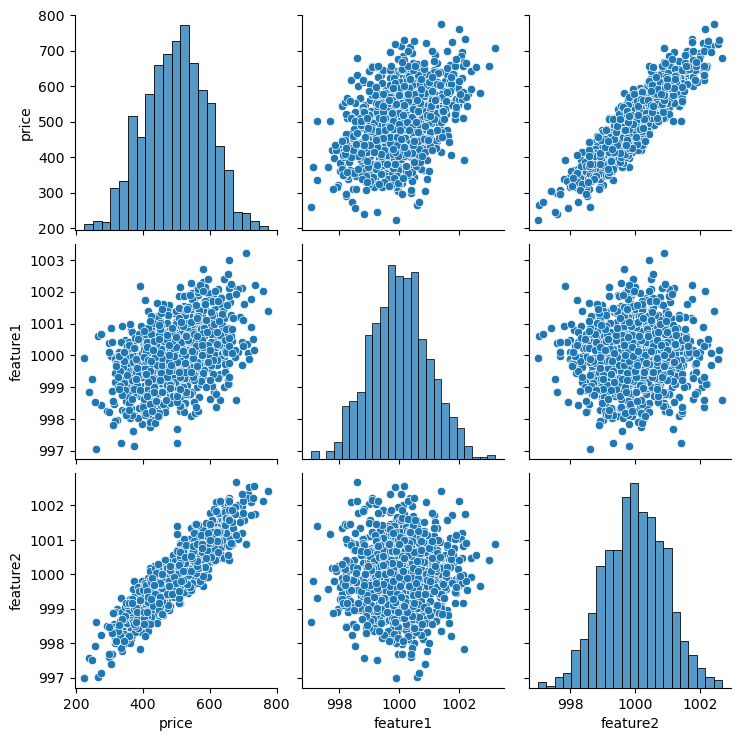

In [7]:
sns.pairplot(data=df)

In [8]:
from sklearn.model_selection import train_test_split

In [123]:
X = df.drop('price', axis = 1).values

In [124]:
y = df['price'].values

In [125]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
X_train.shape

(700, 2)

In [56]:
X_test.shape

(300, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [127]:
scaler = MinMaxScaler()

In [128]:
scaler.fit(X_train)   #calculate the parameters it needs later to scale the data

MinMaxScaler()

In [129]:
X_train = scaler.transform(X_train)

In [130]:
X_test = scaler.transform(X_test)

In [117]:
X_train.max()

1.0

In [118]:
X_train.min()

0.0

In [29]:
X_test.max()

1.0186515935232023

In [30]:
X_test.min()

-0.014108392024525074

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8))
 |  model.add(tf.keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(s

In [38]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of t

In [41]:
#model = Sequential([Dense(4,activation='relu'),
#                   Dense(2,activation='relu'),
#                   Dense(1)])

In [131]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

#this is the last layer, depends on what you are predicting.
#in this case, we are predicting a single numeric price based on the features, so it's just a single neuron
model.add(Dense(1))

#optimizer, how do you want to perform gradient descent
#loss function. Typically, for multi-class classification problem: loss='categorical_crossentropy'
#for a binary classification: loss='binary_crossentropy'
#for continueous outcome, a regression problem, loss='mse'
model.compile(optimizer='rmsprop', loss='mse')

In [132]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 669us/step - loss: 256668.6406
Epoch 2/250
22/22 [==============================] - 0s 646us/step - loss: 256577.6719
Epoch 3/250
22/22 [==============================] - 0s 587us/step - loss: 256471.0781
Epoch 4/250
22/22 [==============================] - 0s 631us/step - loss: 256336.1875
Epoch 5/250
22/22 [==============================] - 0s 589us/step - loss: 256168.3438
Epoch 6/250
22/22 [==============================] - 0s 561us/step - loss: 255961.2812
Epoch 7/250
22/22 [==============================] - 0s 587us/step - loss: 255710.1094
Epoch 8/250
22/22 [==============================] - 0s 559us/step - loss: 255405.6719
Epoch 9/250
22/22 [==============================] - 0s 555us/step - loss: 255042.0625
Epoch 10/250
22/22 [==============================] - 0s 550us/step - loss: 254611.2969
Epoch 11/250
22/22 [==============================] - 0s 541us/step - loss: 254100.7031
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 541us/step - loss: 919.1489
Epoch 96/250
22/22 [==============================] - 0s 597us/step - loss: 882.4693
Epoch 97/250
22/22 [==============================] - 0s 514us/step - loss: 847.7512
Epoch 98/250
22/22 [==============================] - 0s 559us/step - loss: 811.5220
Epoch 99/250
22/22 [==============================] - 0s 593us/step - loss: 778.1901
Epoch 100/250
22/22 [==============================] - 0s 538us/step - loss: 737.2155
Epoch 101/250
22/22 [==============================] - 0s 573us/step - loss: 706.3251
Epoch 102/250
22/22 [==============================] - 0s 527us/step - loss: 671.1027
Epoch 103/250
22/22 [==============================] - 0s 583us/step - loss: 642.1672
Epoch 104/250
22/22 [==============================] - 0s 532us/step - loss: 609.8752
Epoch 105/250
22/22 [==============================] - 0s 527us/step - loss: 577.0521
Epoch 106/250
22/22 [==============================] - 0s 522us/step - l

22/22 [==============================] - 0s 471us/step - loss: 24.8379
Epoch 192/250
22/22 [==============================] - 0s 484us/step - loss: 24.7215
Epoch 193/250
22/22 [==============================] - 0s 504us/step - loss: 24.6464
Epoch 194/250
22/22 [==============================] - 0s 525us/step - loss: 25.7053
Epoch 195/250
22/22 [==============================] - 0s 510us/step - loss: 24.8228
Epoch 196/250
22/22 [==============================] - 0s 517us/step - loss: 25.1573
Epoch 197/250
22/22 [==============================] - 0s 521us/step - loss: 24.8177
Epoch 198/250
22/22 [==============================] - 0s 509us/step - loss: 24.8954
Epoch 199/250
22/22 [==============================] - 0s 471us/step - loss: 24.6221
Epoch 200/250
22/22 [==============================] - 0s 510us/step - loss: 25.1148
Epoch 201/250
22/22 [==============================] - 0s 481us/step - loss: 25.2395
Epoch 202/250
22/22 [==============================] - 0s 526us/step - loss: 24

In [133]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

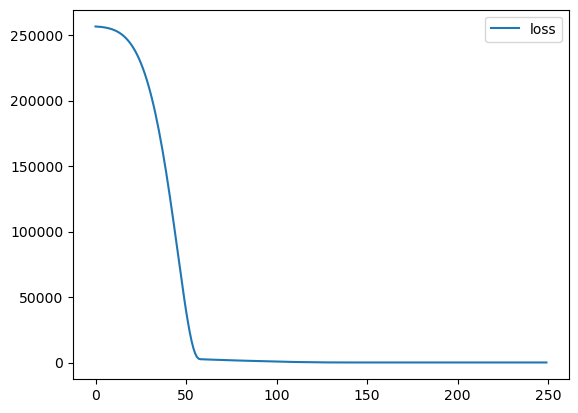

In [134]:
loss_df.plot()

In [67]:
#Evaluation

In [135]:
model.evaluate(X_test,y_test,verbose=0)

24.947908401489258

In [136]:
model.evaluate(X_train,y_train,verbose=0)

24.038799285888672

In [137]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 601us/step


In [138]:
test_predictions

array([[405.04352],
       [623.3169 ],
       [591.90955],
       [571.9892 ],
       [366.34943],
       [578.94946],
       [514.802  ],
       [458.8739 ],
       [549.0061 ],
       [447.2862 ],
       [611.5624 ],
       [548.73175],
       [418.854  ],
       [408.62012],
       [651.03973],
       [437.0614 ],
       [508.23126],
       [659.6987 ],
       [662.35913],
       [565.31537],
       [333.96527],
       [444.59106],
       [382.27158],
       [378.50684],
       [566.3654 ],
       [610.3596 ],
       [532.156  ],
       [427.6183 ],
       [655.21545],
       [413.843  ],
       [442.40073],
       [484.8907 ],
       [438.17325],
       [681.62463],
       [424.52496],
       [417.43448],
       [501.70987],
       [550.2466 ],
       [509.4859 ],
       [395.09424],
       [618.3721 ],
       [416.3886 ],
       [604.22815],
       [445.73035],
       [501.75336],
       [581.5074 ],
       [668.79724],
       [490.17273],
       [318.33133],
       [485.18854],


In [139]:
test_predictions = pd.DataFrame(test_predictions.reshape(300,), columns=['Predictions'])

In [140]:
true_y = pd.DataFrame(y_test, columns=['True Y'])

In [141]:
Pred_df = pd.concat([test_predictions,true_y], axis=1)

In [142]:
Pred_df

,Predictions,True Y
0,405.043518,402.296319
1,623.316895,624.156198
2,591.909546,582.455066
3,571.989197,578.588606
4,366.349426,371.224104
...,...,...
295,528.804688,525.704657
296,515.069763,502.909473
297,609.429443,612.727910
298,416.717957,417.569725


<Axes: >

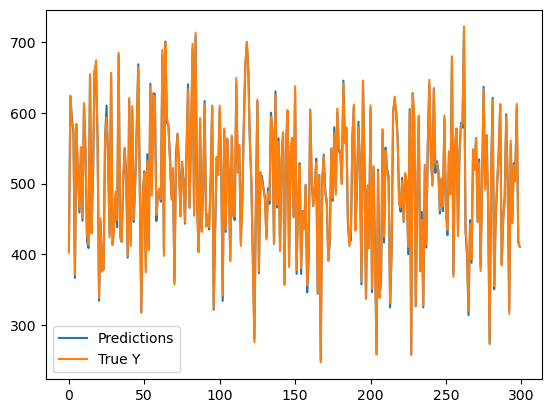

In [143]:
Pred_df.plot()

<Axes: xlabel='True Y', ylabel='Predictions'>

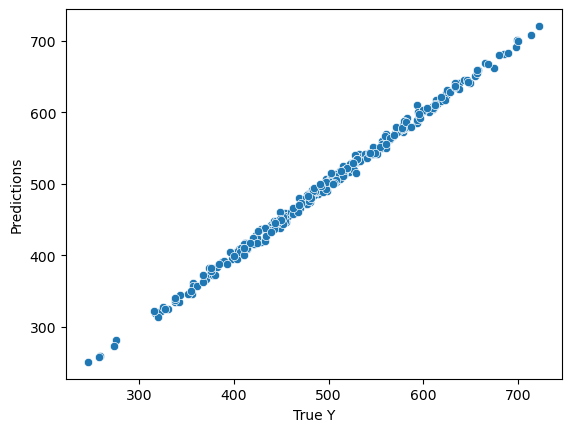

In [144]:
sns.scatterplot(x='True Y', y='Predictions', data=Pred_df)

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [145]:
mean_absolute_error(Pred_df['True Y'],Pred_df['Predictions'])

3.9977673585109583

In [146]:
mean_squared_error(Pred_df['True Y'],Pred_df['Predictions'])

24.94791467262729

In [147]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [148]:
new_gem = [[998,1000]]

In [149]:
new_gem = scaler.transform(new_gem)

In [150]:
model.predict(new_gem)

1/1 [==============================] - 0s 10ms/step


array([[419.42642]], dtype=float32)

In [101]:
from tensorflow.keras.models import load_model

In [151]:
model.save('my_gem_model.h5')

/Users/tdraly/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [152]:
later_model = load_model('my_gem_model.h5')

In [153]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 30ms/step


array([[419.42642]], dtype=float32)